In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format #turn off scientific notation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.stats import linregress
import scipy.stats as stats

## Read Cleaned Zillow Data

In [3]:
#read Zillow 3 bedroom data by county into pandas dataframe 
file = "output files/zillow_clean_df.csv" 
zillow_df = pd.read_csv(file, index_col = 0) 
#zillow_df = pd.read_csv(file) 
zillow_df.head()

,Los Angeles County,Fresno County,San Francisco County,Shasta County
2014 Avg Price,456951.25,180313.22,1194854.92,202065.47
2015 Avg Price,482374.33,191649.06,1292884.22,216334.31
2016 Avg Price,518062.94,203774.64,1388945.64,226238.28
2017 Avg Price,555362.75,220687.50,1471771.03,241436.89
2018 Avg Price,596094.53,238799.28,1620575.75,253039.00


## Read Income Data

In [4]:
income_df=pd.read_csv("output files/income_df.csv", index_col = 0) 
income_df.head()

,Los Angeles County,Fresno County,San Francisco County,Shasta County
2014 Income,50730,36448,97498,38410
2015 Income,53521,38323,103529,40882
2016 Income,57127,40327,114697,43412
2017 Income,59058,41137,121778,44480
2018 Income,62224,43084,130696,46582


## Plot Income vs. Housing Data

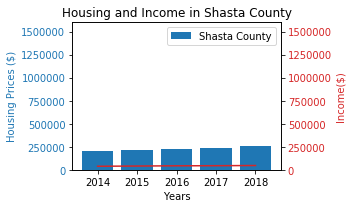

In [5]:
#plot Shasta income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Shasta County"]
y2bar = income_df.loc[:, "Shasta County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Shasta County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Shasta County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("IncomandHousingPricesinShastaCounty.png")
plt.show()

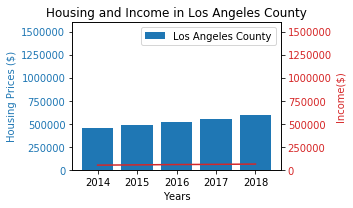

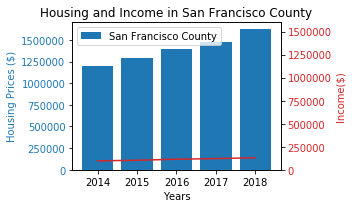

In [6]:
#plot LA income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Los Angeles County"]
y2bar = income_df.loc[:, "Los Angeles County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Los Angeles County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Los Angeles County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_LACounty.png")
plt.show()

#plot SF income and housing price with 2 y axis
fig, ax1 = plt.subplots(figsize=(5,3))

y1line = zillow_df.loc[:,"San Francisco County"]
y2bar = income_df.loc[:, "San Francisco County"]
color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in San Francisco County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['San Francisco County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_SFCounty.png")
plt.show()

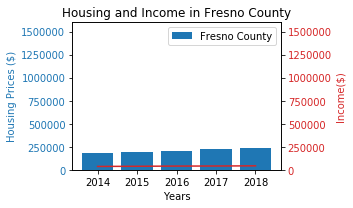

In [7]:
#plot Fresno income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Fresno County"]
y2bar = income_df.loc[:, "Fresno County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Fresno County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Fresno County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_FresnoCounty.png")
plt.show()

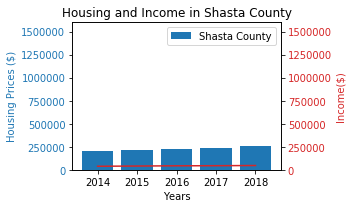

In [8]:
#plot Shasta income and housing price with 2 y axis
x=[2014, 2015, 2016, 2017, 2018]
y1line = zillow_df.loc[:,"Shasta County"]
y2bar = income_df.loc[:, "Shasta County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1600000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Income in Shasta County')
ax1.bar(x, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Shasta County'], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 1600000) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel('Income($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Income_HousingPrices_ShastaCounty.png")
plt.show()

## Plot Income vs. Housing Price Scatter - all CA counties for 2018

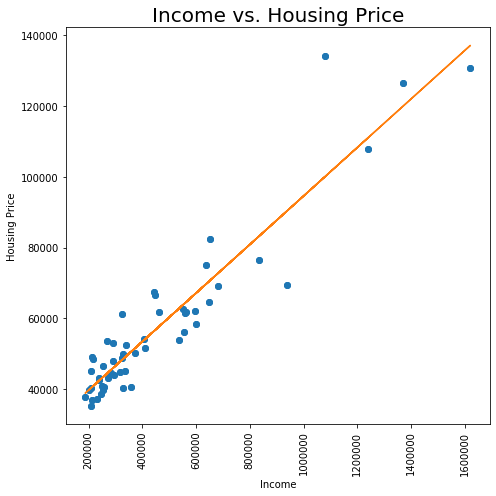

p_value: 5.92e-25
r_value: 0.94


In [34]:
#We want to explore the relationship between housing prices and income for all CA counties for 2018
# Show linear relationship between Income and Housing Price

#read data files
zillow_clean_all_counties_df = pd.read_csv("output files/zillow_clean_all_counties_df.csv")
all_counties_income_df = pd.read_csv("output files/all_counties_income.csv", )

#merge income and housing into one table
income_housing_2018_df = pd.merge(zillow_clean_all_counties_df, all_counties_income_df, on="RegionName", how = "inner")
#rename column
income_housing_2018_df= income_housing_2018_df.rename(columns={"RegionName":"County"})
income_housing_2018_df

#plot scatter
fig, ax1 = plt.subplots(figsize=(7,7))
x = income_housing_2018_df["Price"]
y = income_housing_2018_df["Income"]
ax1.scatter(x, y)
plt.xticks(rotation=90)

#plot regression
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,y)
predict_y = slope * x + intercept
plt.plot(x, y, "o")
plt.plot(x, predict_y)


ax1.set_xlabel("Income")
ax1.set_ylabel("Housing Price")
ax1.set_title("Income vs. Housing Price", size = 20)

fig.tight_layout()
plt.savefig ("output images/Income_Housing_Scatter_Regression.png")
plt.show()

#round the r-value (correlation coefficient) and p-value
p_value = '{:0.2e}'.format(p_value)
r_value = '{:0.2}'.format(r_value)

print(f"p_value: {p_value}")
print(f"r_value: {r_value}")

## Read Rental Data

In [10]:
#Read Rental Data 
rental_df = pd.read_csv("output files/rentals4counties.csv", index_col = 0)
rental_df.head()

,Los Angeles County,San Francisco County,Fresno County,Shasta County
0,,,,
Average 2014 Rentals,2376.25,5374.17,1106.04,1161.25
Average 2015 Rentals,2711.67,5978.54,1180.00,1243.12
Average 2016 Rentals,2827.50,5685.04,1239.58,1250.42
Average 2017 Rentals,3020.42,5446.25,1337.71,1300.42
Average 2018 Rentals,3121.62,5498.58,1424.38,1390.42


## Plot Rental vs. Housing Data

<IPython.core.display.Javascript object>


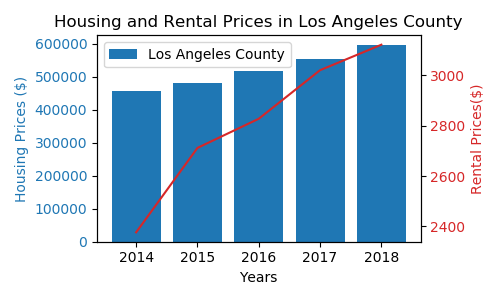

In [133]:
#plot LA rental and housing price with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["Los Angeles County"]
y2bar = rental_df["Los Angeles County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Rental Prices in Los Angeles County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Los Angeles County'], facecolor='w')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Rental_HousingPricesi_LACounty.png")
plt.show()

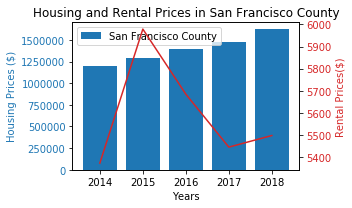

In [37]:
#plot San Francisco rental and housing price with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["San Francisco County"]
y2bar = rental_df["San Francisco County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Rental Prices in San Francisco County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['San Francisco County'], facecolor='w')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Rental_HousingPricesi_SFCounty.png")
plt.show()

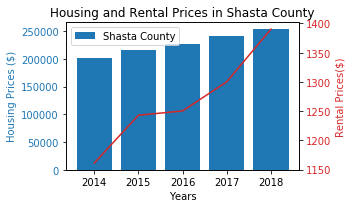

In [14]:
#plot LA rental and housing price with 2 y axis
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["Shasta County"]
y2bar = rental_df["Shasta County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Shasta County'], facecolor='w')
ax1.set_title('Housing and Rental Prices in Shasta County')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Rental_HousingPrices_ShastaCounty.png")
plt.show()

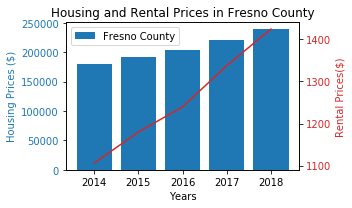

In [15]:
x= ['2014','2015', '2016', '2017', '2018']
y1line = zillow_df["Fresno County"]
y2bar = rental_df["Fresno County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Fresno County'], facecolor='w')
ax1.set_title('Housing and Rental Prices in Fresno County')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Rental_HousingPrices_FresnoCounty.png")
plt.show()

## Rental averages for 4 counties

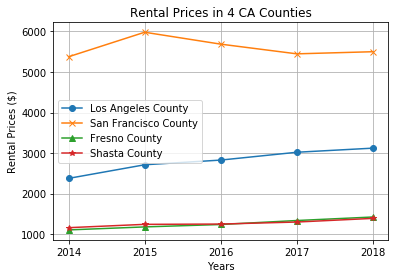

In [16]:
x= ['2014','2015', '2016', '2017', '2018']
plt.plot(x, rental_df["Los Angeles County"], marker="o", label = "Los Angeles County")
plt.plot(x, rental_df["San Francisco County"], marker="x", label = "San Francisco County")
plt.plot(x, rental_df["Fresno County"], marker="^", label = "Fresno County")
plt.plot(x, rental_df["Shasta County"], marker="*", label = "Shasta County")

# Incorporate the other graph properties
plt.title("Rental Prices in 4 CA Counties")
plt.ylabel("Rental Prices ($)")
plt.xlabel("Years")
plt.grid(True)
plt.legend(loc="best")

#plt.xlim(0,4)
#plt.ylim(950,6500)
#plt.figure(figsize=(20,10))

plt.savefig("output images/Rental_Prices_4Counties.png")
plt.show()

## ANOVA and t Test

In [17]:
#compare rental data
group1 = rental_df["Los Angeles County"] 
group2 = rental_df["San Francisco County"]
group3 = rental_df["Shasta County"]
group4 = rental_df["Fresno County"]

ANOVA shows p value to be significant

In [18]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=500.9461360052821, pvalue=5.039318988502746e-16)

t Test shows significance between LA and Shasta and San Francisco rental prices means they are different but Fresno and Shasta are not different

In [19]:
stats.ttest_ind(group2, group3, equal_var=False)

Ttest_indResult(statistic=37.68337349106659, pvalue=2.7989971256772566e-07)

In [20]:
stats.ttest_ind(group1, group3, equal_var=False)

Ttest_indResult(statistic=11.372907286194094, pvalue=0.00014098256766199814)

In [21]:
stats.ttest_ind(group3, group4, equal_var=False)

Ttest_indResult(statistic=0.17087855216510933, pvalue=0.8691693277893662)

In [22]:
stats.ttest_ind(group1, group2, equal_var=False)

Ttest_indResult(statistic=-16.42690622372465, pvalue=2.681567814305284e-07)

In [23]:
stats.ttest_ind(group1, group4, equal_var=False)

Ttest_indResult(statistic=10.946615634798597, pvalue=6.494719904989934e-05)

In [24]:
stats.ttest_ind(group2, group4, equal_var=False)

Ttest_indResult(statistic=35.49046671080653, pvalue=3.2394593422615825e-08)

## Plot Rental vs. Housing Price Scatter - all CA counties for 2018

In [25]:
#read housing rental for all CA counties, 2018
counties2018_df = pd.read_csv("output files/rentals_all_counties_2018.csv")
counties2018_df.head()

,RegionName,State,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,Average 2018 Rentals
0,Los Angeles County,CA,3000.00,3000.00,3000.00,3100.00,3150.00,3195.00,3195.00,3200.00,3133.50,3141.00,3195.00,3150.00,3121.62
1,San Diego County,CA,2700.00,2700.00,2750.00,2800.00,2800.00,2800.00,2850.00,2850.00,2800.00,2765.00,2750.00,2800.00,2780.42
2,Orange County,CA,3150.00,3195.00,3195.00,3200.00,3200.00,3200.00,3195.00,3150.00,3195.00,3200.00,3195.00,3200.00,3189.58
3,Riverside County,CA,1995.00,2003.50,2050.00,2100.00,2100.00,2095.00,2095.00,2099.00,2100.00,2150.00,2175.00,2150.00,2092.71
4,San Bernardino County,CA,1835.00,1900.00,1950.00,1995.00,1950.00,2000.00,2000.00,2000.00,1995.00,1950.00,2095.00,2086.00,1979.67


In [26]:
#read zillow data for all CA counties for 2018
housing2018_df = pd.read_csv('output files/zillow_clean_all_counties_df.csv', index_col=0)
housing2018_df.head()

,Price
RegionName,
Los Angeles County,596094.53
San Diego County,560627.31
Orange County,683327.61
Riverside County,356364.39
San Bernardino County,327473.67


In [27]:
#merge housing and rental data on counties, 
housing_rental_df= pd.merge(housing2018_df, counties2018_df, on="RegionName", how="inner")
housing_rental_df.head()

,RegionName,Price,State,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,Average 2018 Rentals
0,Los Angeles County,596094.53,CA,3000.00,3000.00,3000.00,3100.00,3150.00,3195.00,3195.00,3200.00,3133.50,3141.00,3195.00,3150.00,3121.62
1,San Diego County,560627.31,CA,2700.00,2700.00,2750.00,2800.00,2800.00,2800.00,2850.00,2850.00,2800.00,2765.00,2750.00,2800.00,2780.42
2,Orange County,683327.61,CA,3150.00,3195.00,3195.00,3200.00,3200.00,3200.00,3195.00,3150.00,3195.00,3200.00,3195.00,3200.00,3189.58
3,Riverside County,356364.39,CA,1995.00,2003.50,2050.00,2100.00,2100.00,2095.00,2095.00,2099.00,2100.00,2150.00,2175.00,2150.00,2092.71
4,San Bernardino County,327473.67,CA,1835.00,1900.00,1950.00,1995.00,1950.00,2000.00,2000.00,2000.00,1995.00,1950.00,2095.00,2086.00,1979.67


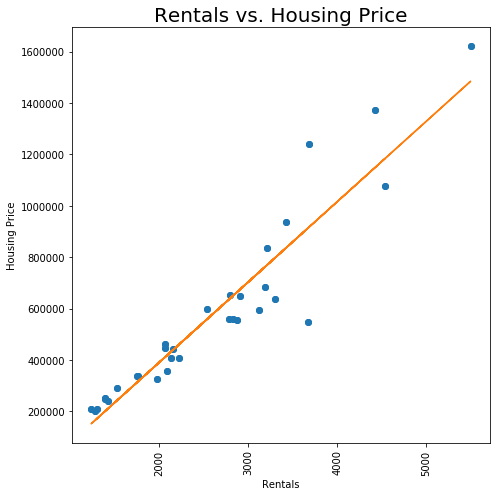

p_value: 1.68e-15
r_value: 0.94


In [36]:
fig, ax1 = plt.subplots(figsize=(7,7))
y = housing_rental_df["Price"]
x = housing_rental_df["Average 2018 Rentals"]
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x,y)
predict_y = slope * x + intercept
ax1.scatter(x, y)
plt.xticks(rotation=90)
plt.plot(x, y, 'o')
plt.plot(x, predict_y)
ax1.set_xlabel("Rentals")
ax1.set_ylabel("Housing Price")
ax1.set_title("Rentals vs. Housing Price", size =20)
fig.tight_layout()
plt.savefig ("output images/Rental_Housing_Scatter_Regression.png")
plt.show()

#round the r-value (correlation coefficient) and p-value
p_value = '{:0.2e}'.format(p_value)
r_value = '{:0.2}'.format(r_value)

print(f"p_value: {p_value}")
print(f"r_value: {r_value}")

## Read Unemployment Data

In [119]:
labor_reform = pd.read_csv("output files/labor_reform.csv", index_col=0)
labor_reform.head()

,Fresno County,Los Angeles County,San Francisco County,Shasta County
Year,,,,
2014,11.60,8.30,4.40,9.60
2015,10.20,6.60,3.60,7.80
2016,9.50,5.30,3.30,7.00
2017,8.50,4.80,2.90,5.80
2018,7.50,4.70,2.40,4.90


In [59]:
labor_change = pd.read_csv("output files/labor_change.csv", index_col=0)
labor_change.head()

,Fresno County,Los Angeles County,San Francisco County,Shasta County
Year,,,,
2014,0.09,0.51,2.38,-0.53
2015,0.50,-0.06,2.52,-0.93
2016,1.02,1.03,2.57,0.13
2017,0.07,1.09,1.57,-0.27
2018,0.70,0.78,1.97,0.13


## Unemployment vs. Housing Data

<IPython.core.display.Javascript object>


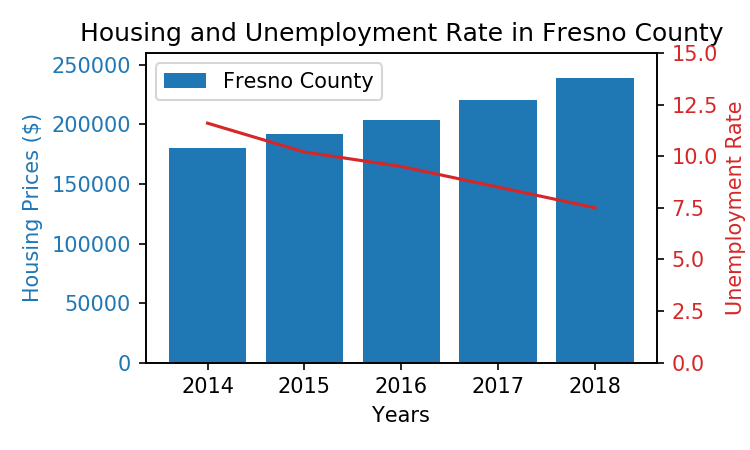

In [60]:
x_axis = labor_reform.index
y1line = zillow_df.loc[:, "Fresno County"]
y2bar = labor_reform.loc[:, "Fresno County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 260000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Unemployment Rate in Fresno County')
ax1.bar(x_axis, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["Fresno County"], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 15) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel("Unemployment Rate", color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Unemployment_HousingPrices_FresnoCounty.png")
plt.show()

<IPython.core.display.Javascript object>


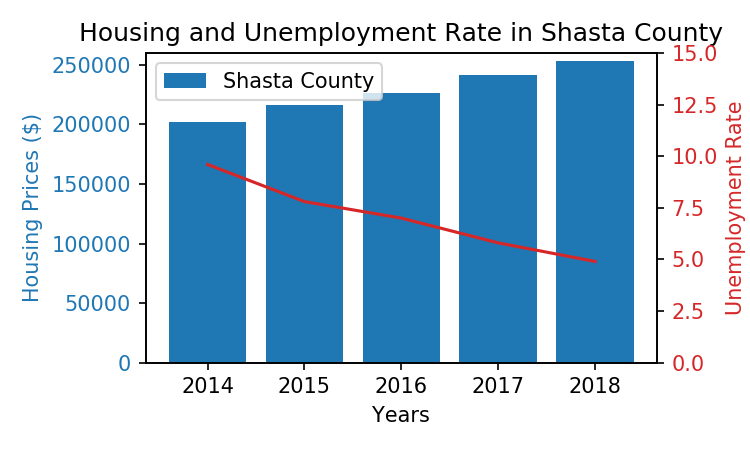

In [62]:
x_axis = labor_reform.index
y1line = zillow_df.loc[:, "Shasta County"]
y2bar = labor_reform.loc[:, "Shasta County"]


fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 260000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Unemployment Rate in Shasta County')
ax1.bar(x_axis, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["Shasta County"], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 15) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel("Unemployment Rate", color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Unemployment_HousingPrices_ShastaCounty.png")
plt.show()

<IPython.core.display.Javascript object>


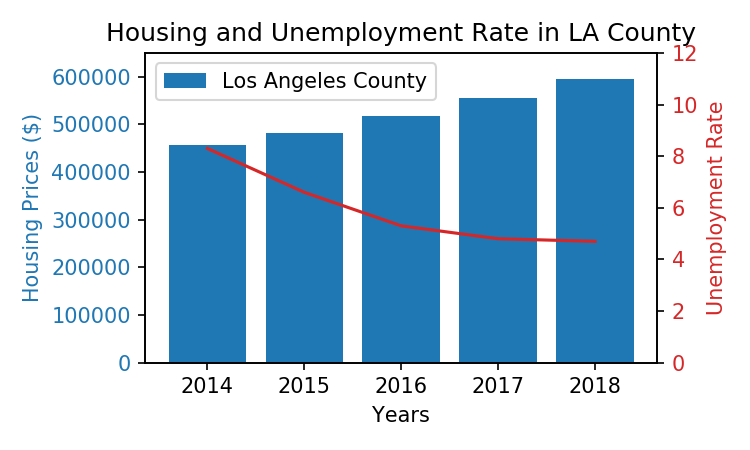

In [64]:
x_axis = labor_reform.index
y1line = zillow_df.loc[:, "Los Angeles County"]
y2bar = labor_reform.loc[:, "Los Angeles County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 650000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Unemployment Rate in LA County')
ax1.bar(x_axis, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["Los Angeles County"], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 12) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel("Unemployment Rate", color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Unemployment_HousingPrices_LACounty.png")
plt.show()

<IPython.core.display.Javascript object>


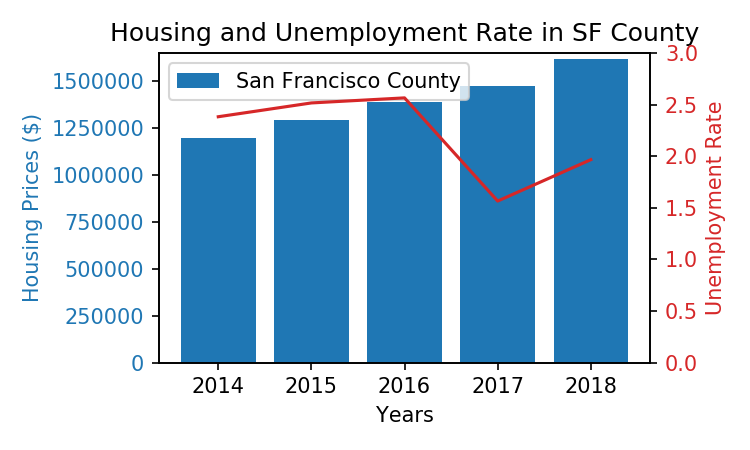

In [65]:
x_axis = labor_reform.index
y1line = zillow_df.loc[:, "San Francisco County"]
y2bar = labor_change.loc[:, "San Francisco County"]

fig, ax1 = plt.subplots(figsize=(5,3))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylim(0, 1650000)
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Unemployment Rate in SF County')
ax1.bar(x_axis, y1line, color=color) 
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(["San Francisco County"], facecolor='w')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylim(0, 3) #set limit on second axis to same scale as first axis
color = 'tab:red'
ax2.set_ylabel("Unemployment Rate", color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("output images/Unemployment_HousingPrices_SFCounty.png")
plt.show()

## Crime

In [45]:
#read crime data for 4 counties
#https://openjustice.doj.ca.gov/exploration/crime-statistics/crimes-clearances




,County,Year,Violent_Crimes,County_Year
0,Fresno County,2014,4547,Fresno County_2014
1,Fresno County,2015,5228,Fresno County_2015
2,Fresno County,2016,5981,Fresno County_2016
3,Fresno County,2017,5745,Fresno County_2017
4,Fresno County,2018,5889,Fresno County_2018
5,Los Angeles County,2014,42725,Los Angeles County_2014
6,Los Angeles County,2015,50466,Los Angeles County_2015
7,Los Angeles County,2016,56351,Los Angeles County_2016
8,Los Angeles County,2017,59924,Los Angeles County_2017
9,Los Angeles County,2018,58567,Los Angeles County_2018
